In [2]:
import pandas as pd

Load the dataset

In [3]:
df = pd.read_csv('/content/Retail_Customer.csv')

Convert 'Visit_Date' column to datetime

In [4]:
df['Visit_Date'] = pd.to_datetime(df['Visit_Date'])

 Calculate the reference date (last date of 5th week)

In [5]:
reference_date = df['Visit_Date'].max() - pd.DateOffset(weeks=5)

setting the date with respect to reference data

In [6]:
feature_set = df[df['Visit_Date'] >= reference_date]

Defining the feature set

In [7]:
feature_set = feature_set[['CustomerID', 'Total_Purchases_In_USD']]

Printing the feature set

In [8]:
print(feature_set.head())

   CustomerID  Total_Purchases_In_USD
0   104790628                   51.36
1     6927608                   77.04
2  1078961990                   85.60
3  1034571766                   85.60
4  1094103886                   51.36


In [9]:
print(df)

       Visit_Date  CustomerID  Total_Purchases_In_USD
0      2014-09-17   104790628                   51.36
1      2014-09-17     6927608                   77.04
2      2014-09-17  1078961990                   85.60
3      2014-09-17  1034571766                   85.60
4      2014-09-17  1094103886                   51.36
...           ...         ...                     ...
467523 2014-10-04   828458332                  171.20
467524 2014-10-04   623985510                  136.96
467525 2014-10-04   104928130                  171.20
467526 2014-10-04    48169222                  171.20
467527 2014-10-04      112477                     NaN

[467528 rows x 3 columns]


Creating Additional Churn Features

In [10]:
# Step 1: Load the provided CSV file containing the data
data = pd.read_csv('/content/Retail_Customer.csv')


In [11]:
print(data.describe())

         CustomerID  Total_Purchases_In_USD
count  4.675280e+05           467527.000000
mean   5.867787e+08              135.535064
std    4.828651e+08              156.930969
min    4.880000e+02                0.000000
25%    8.861240e+07               77.040000
50%    7.395870e+08               85.600000
75%    1.079307e+09              171.200000
max    1.204996e+09            34240.000000


In [12]:
# Function to calculate total revenue for each customer
def calculate_total_revenue(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].sum()

# Function to calculate maximum purchase in a day for each customer
def calculate_max_purchase_in_a_day(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].max()

# Function to calculate minimum purchase in a day for each customer
def calculate_min_purchase_in_a_day(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].min()

# Function to calculate total visit days for each customer
def calculate_total_visit_days(df):
    return df.groupby('CustomerID').size()

# Function to calculate standard deviation in sales for each customer
def calculate_standard_deviation_in_sales(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].std()

# Now we'll apply these functions to our dataset
new_features = pd.DataFrame({
    'CUSTOMER_ID': data['CustomerID'].unique(),
    'Total_Revenue': calculate_total_revenue(data),
    'Max_Purchase_In_A_Day': calculate_max_purchase_in_a_day(data),
    'Min_Purchase_In_A_Day': calculate_min_purchase_in_a_day(data),
    'Total_Visit_Days': calculate_total_visit_days(data),
    'Standard_Deviation': calculate_standard_deviation_in_sales(data)
})

# Step 4: Save the new features along with the existing data into a new CSV file
merged_data = pd.merge(data, new_features, left_on='CustomerID', right_on='CUSTOMER_ID', how='left')
merged_data.to_csv('new_features.csv', index=False)


Q1) Calculating the highest purchase

In [ ]:
weekly_purchases = feature_set.groupby('CustomerID')['Total_Purchases_In_USD'].sum()

imp_customer_id = weekly_purchases.idxmax()

highest_purchase_amount = weekly_purchases[imp_customer_id]

print(f"the highest purchase was {highest_purchase_amount:.2f} in the last 5 weeks by Customer with ID {imp_customer_id}")


the highest purchase was 53414.40 in the last 5 weeks by Customer with ID 1032283346


2) important customer

In [ ]:
print(f"Customer with ID {imp_customer_id} is the most important customer with total purchases of {highest_purchase_amount:.2f} in the last 5 weeks.")


Customer with ID 1032283346 is the most important customer with total purchases of 53414.40 in the last 5 weeks.


3) Making Categories for customers based on their purchase

In [ ]:
# thresholds
poor_threshold = 500
mediocre_threshold = 1000

# new column for customer category
df['Customer_Category'] = 'Unknown'

# Categorize customers based on their spending
df.loc[df['Total_Purchases_In_USD'] < poor_threshold, 'Customer_Category'] = 'Poor'
df.loc[(df['Total_Purchases_In_USD'] >= poor_threshold) & (df['Total_Purchases_In_USD'] < mediocre_threshold), 'Customer_Category'] = 'Mediocre'
df.loc[df['Total_Purchases_In_USD'] >= mediocre_threshold, 'Customer_Category'] = 'Rich'

# customer categories
print(df['Customer_Category'].value_counts())


Poor        852029
Mediocre     16852
Rich          1930
Name: Customer_Category, dtype: int64


In [13]:
data

,Visit_Date,CustomerID,Total_Purchases_In_USD
0,9/17/2014,104790628,51.36
1,9/17/2014,6927608,77.04
2,9/17/2014,1078961990,85.60
3,9/17/2014,1034571766,85.60
4,9/17/2014,1094103886,51.36
...,...,...,...
467523,10/4/2014,828458332,171.20
467524,10/4/2014,623985510,136.96
467525,10/4/2014,104928130,171.20
467526,10/4/2014,48169222,171.20


Making a new dataset and saving it in a new file

In [ ]:
feature_set.to_csv('generated_features.csv', index=False)

Visualizations

In [ ]:
import matplotlib.pyplot as plt

1- Histogram

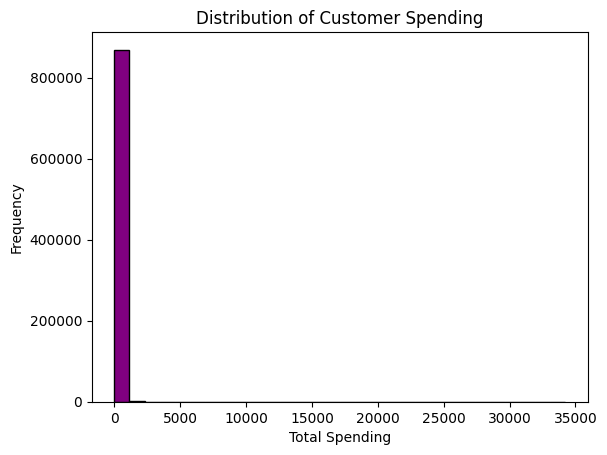

In [ ]:
plt.hist(df['Total_Purchases_In_USD'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()


2-Line Chart

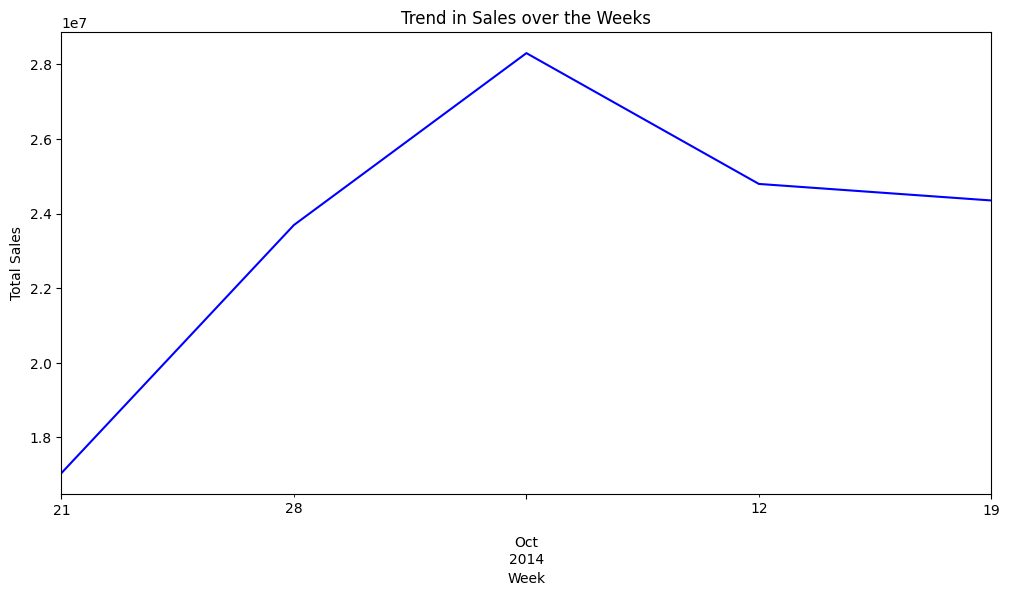

In [ ]:
# Resample the data to weekly frequency
weekly_sales = df.resample('W', on='Visit_Date')['Total_Purchases_In_USD'].sum().fillna(0)

# Plot the line chart
weekly_sales.plot(figsize=(12, 6), color='blue')
plt.title('Trend in Sales over the Weeks')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()


3- Pie Chart

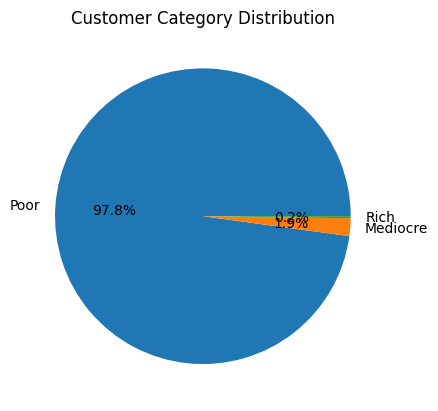

In [ ]:
# Calculate the percentage of each category
category_counts = df['Customer_Category'].value_counts()
category_percentages = category_counts / len(df) * 100

# Create a pie chart
plt.pie(category_percentages, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Customer Category Distribution')
plt.show()
